# Problem 1

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

## Load library and import data

In [1]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_excel("Election_Data.xlsx",index_col=0 ) 

## EDA

In [3]:
df1.head(5)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [4]:
df1.shape

(1525, 9)

The dataset has 1525 rows and 9 columns (8 independent variables and 1 dependent)

In [5]:
#df1=df1.drop('Unnamed: 0', axis=1)

In [6]:
df1.head(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [8]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




## Checking for Missing and duplicate values

In [10]:
# Are there any missing values ?

df1.isna().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There are no missing values

## Checking  for Possible columns which are categorical but are not having data type "object"

In [11]:
df1['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [12]:
df1['economic.cond.household'].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [13]:
df1['Blair'].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [14]:
df1['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [15]:
df1['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [16]:
df1['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

## Making different list for categorical columns and numerical columns

In [17]:
cat=[]
num=[]
for i in df1.columns:
    if df1[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num) 

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


## Describe for numerical and categorical columns

In [18]:
df1[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [19]:
df1[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [20]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




## Are there any duplicates ?

In [21]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df1[dups].head()

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female


There are Duplicates and we'll remove these duplicates

## Removing Duplicates

In [22]:
df1.drop_duplicates(inplace=True) 

In [23]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('shape after removing:',df1.shape)

Number of duplicate rows = 0
shape after removing: (1517, 9)


In [24]:
df1.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

## Outlier Checks

Shape before Outliers Treatment (1517, 9)


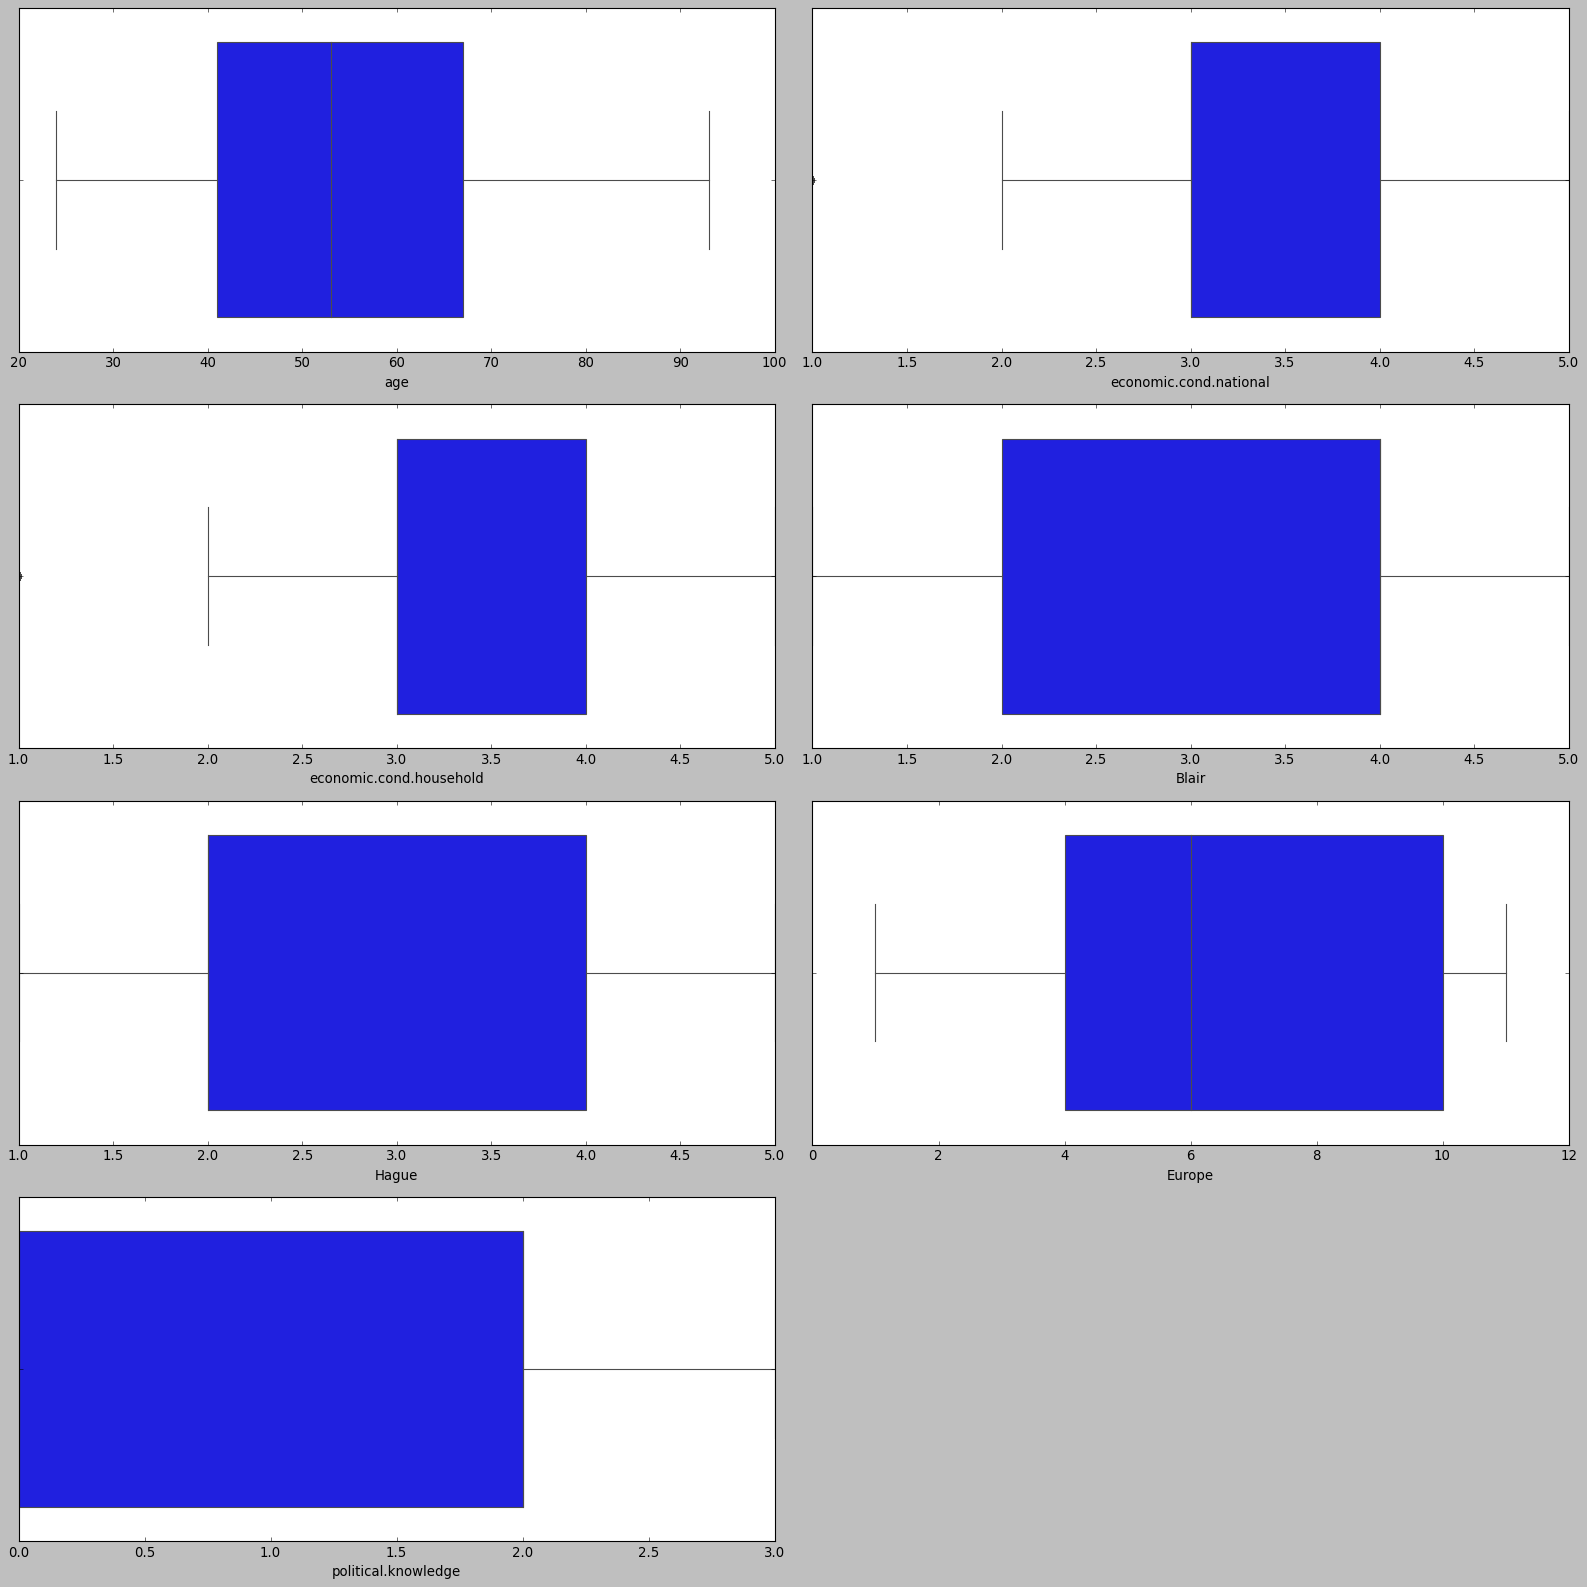

In [25]:
data_plot1=df1[['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot1.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot1[data_plot1.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df1.shape)

Very small no. of Outliers are present, which we can replace by max/min limit 

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [27]:
lr,ur=remove_outlier(df1['economic.cond.national'])
df1['economic.cond.national']=np.where(df1['economic.cond.national']>ur,ur,df1['economic.cond.national'])
df1['economic.cond.national']=np.where(df1['economic.cond.national']<lr,lr,df1['economic.cond.national'])

In [28]:
lr,ur=remove_outlier(df1['economic.cond.household'])
df1['economic.cond.household']=np.where(df1['economic.cond.household']>ur,ur,df1['economic.cond.household'])
df1['economic.cond.household']=np.where(df1['economic.cond.household']<lr,lr,df1['economic.cond.household'])

In [29]:
# Q1,Q3=np.percentile(df1,[25,75])
# IQR=Q3-Q1
# df11 = df1[~((df1<(Q1-1.5*IQR)) | (df1>(Q3+1.5*IQR))).any(axis=1)]

Shape after Outliers Treatment (1517, 9)


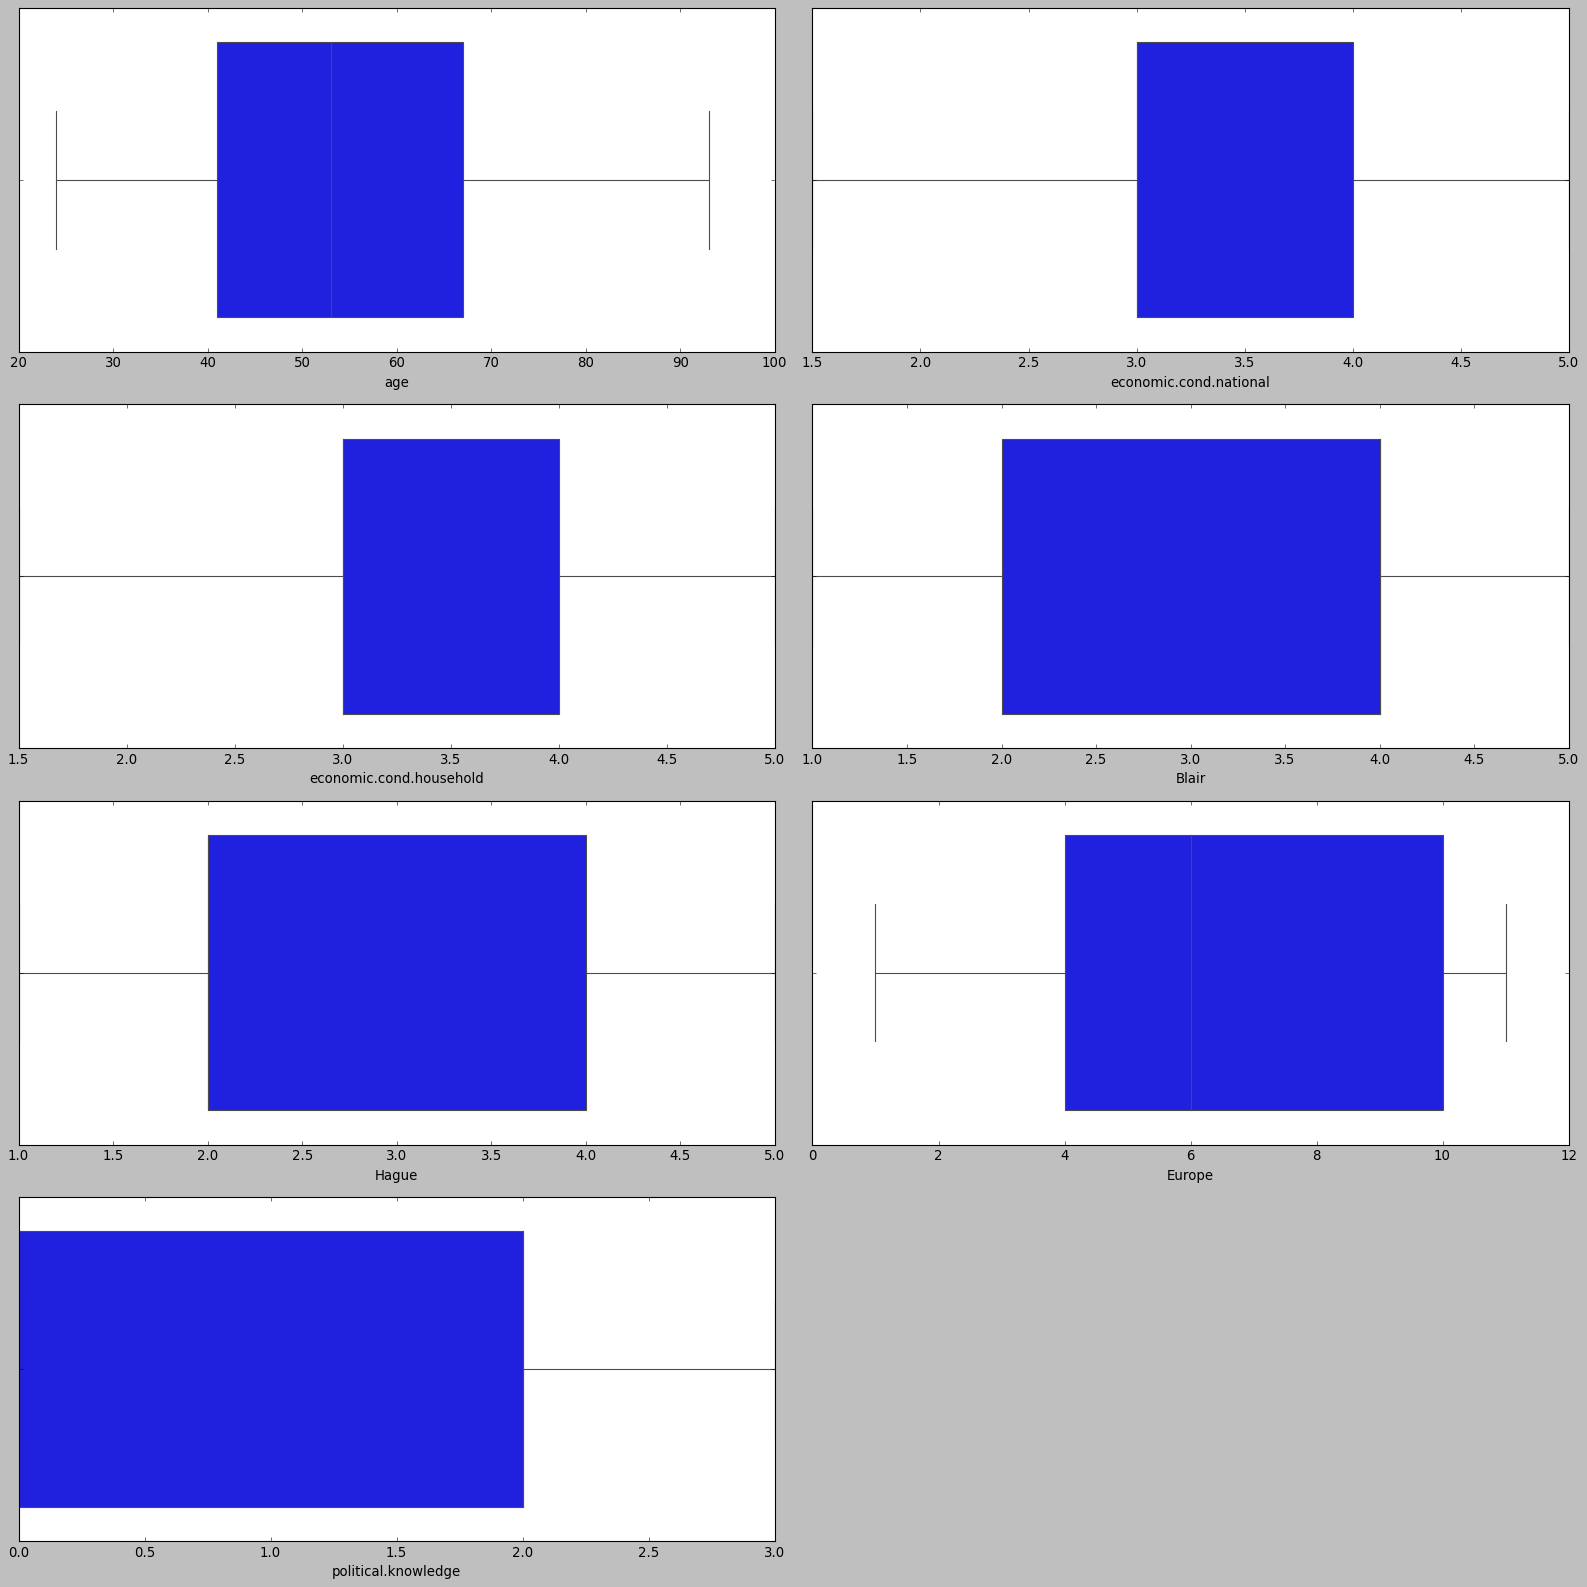

In [30]:
data_plot1=df1[['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot1.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot1[data_plot1.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',df1.shape)

We can infer that no outliers are present in df1

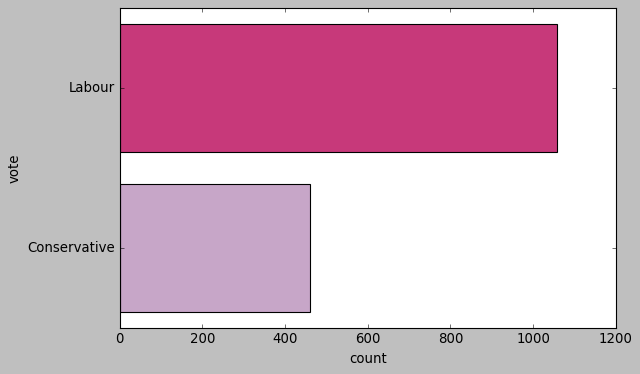

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(y=(df1.vote),palette='PuRd_r')

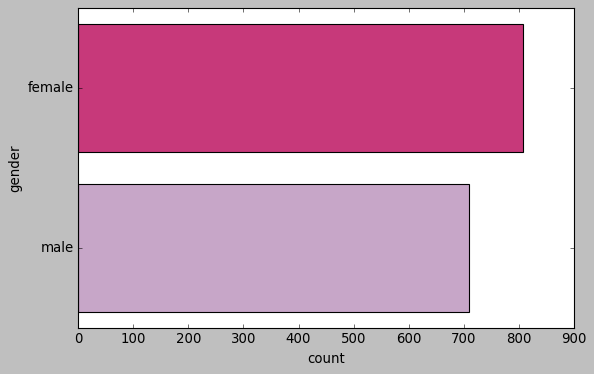

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(y=(df1.gender),palette='PuRd_r')

In [33]:
df1.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

## Univariate analysis

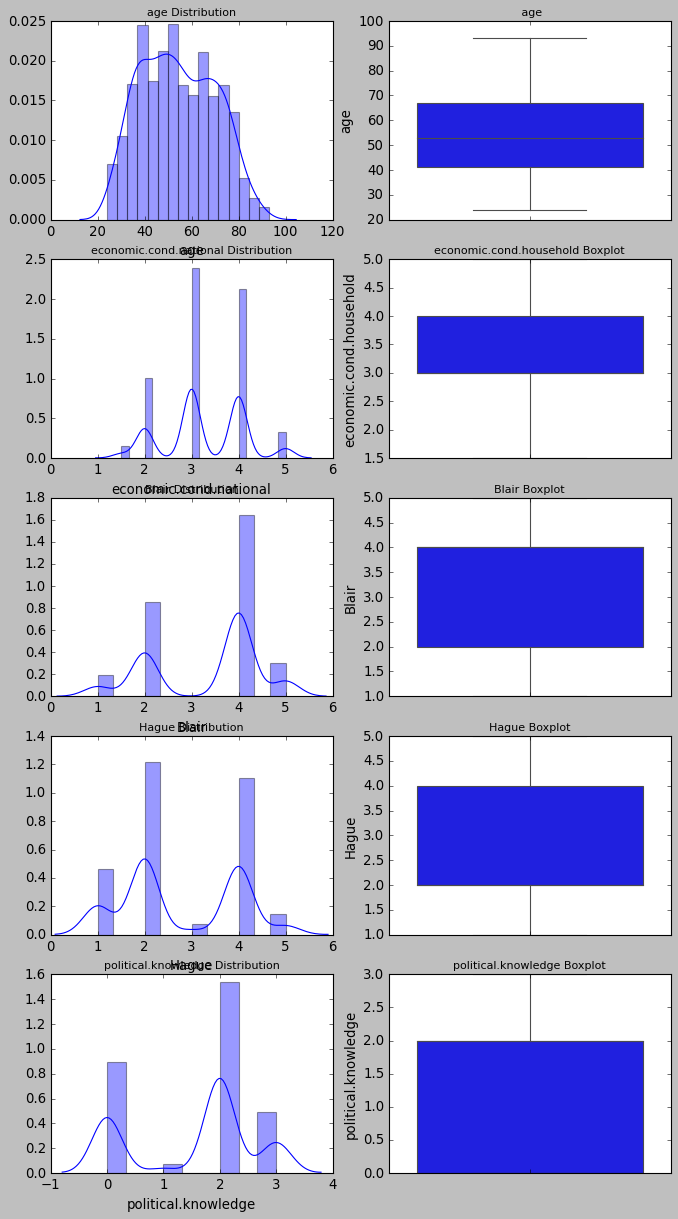

In [34]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10,18)

a = sns.distplot(df1['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df1['age'] , orient = "v" , ax=axes[0][1])
a.set_title(" age",fontsize=10)

a = sns.distplot(df1['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df1['economic.cond.household'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df1['Blair'] , ax=axes[2][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df1['Blair'] , orient = "v" , ax=axes[2][1])
a.set_title("Blair Boxplot",fontsize=10)


a = sns.distplot(df1['Hague'] , ax=axes[3][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df1['Hague'] , orient = "v" , ax=axes[3][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df1['political.knowledge'] , ax=axes[4][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df1['political.knowledge'] , orient = "v" , ax=axes[4][1])
a.set_title("political.knowledge Boxplot",fontsize=10)



plt.show()

## Data Distribution

After Outliers Treatment


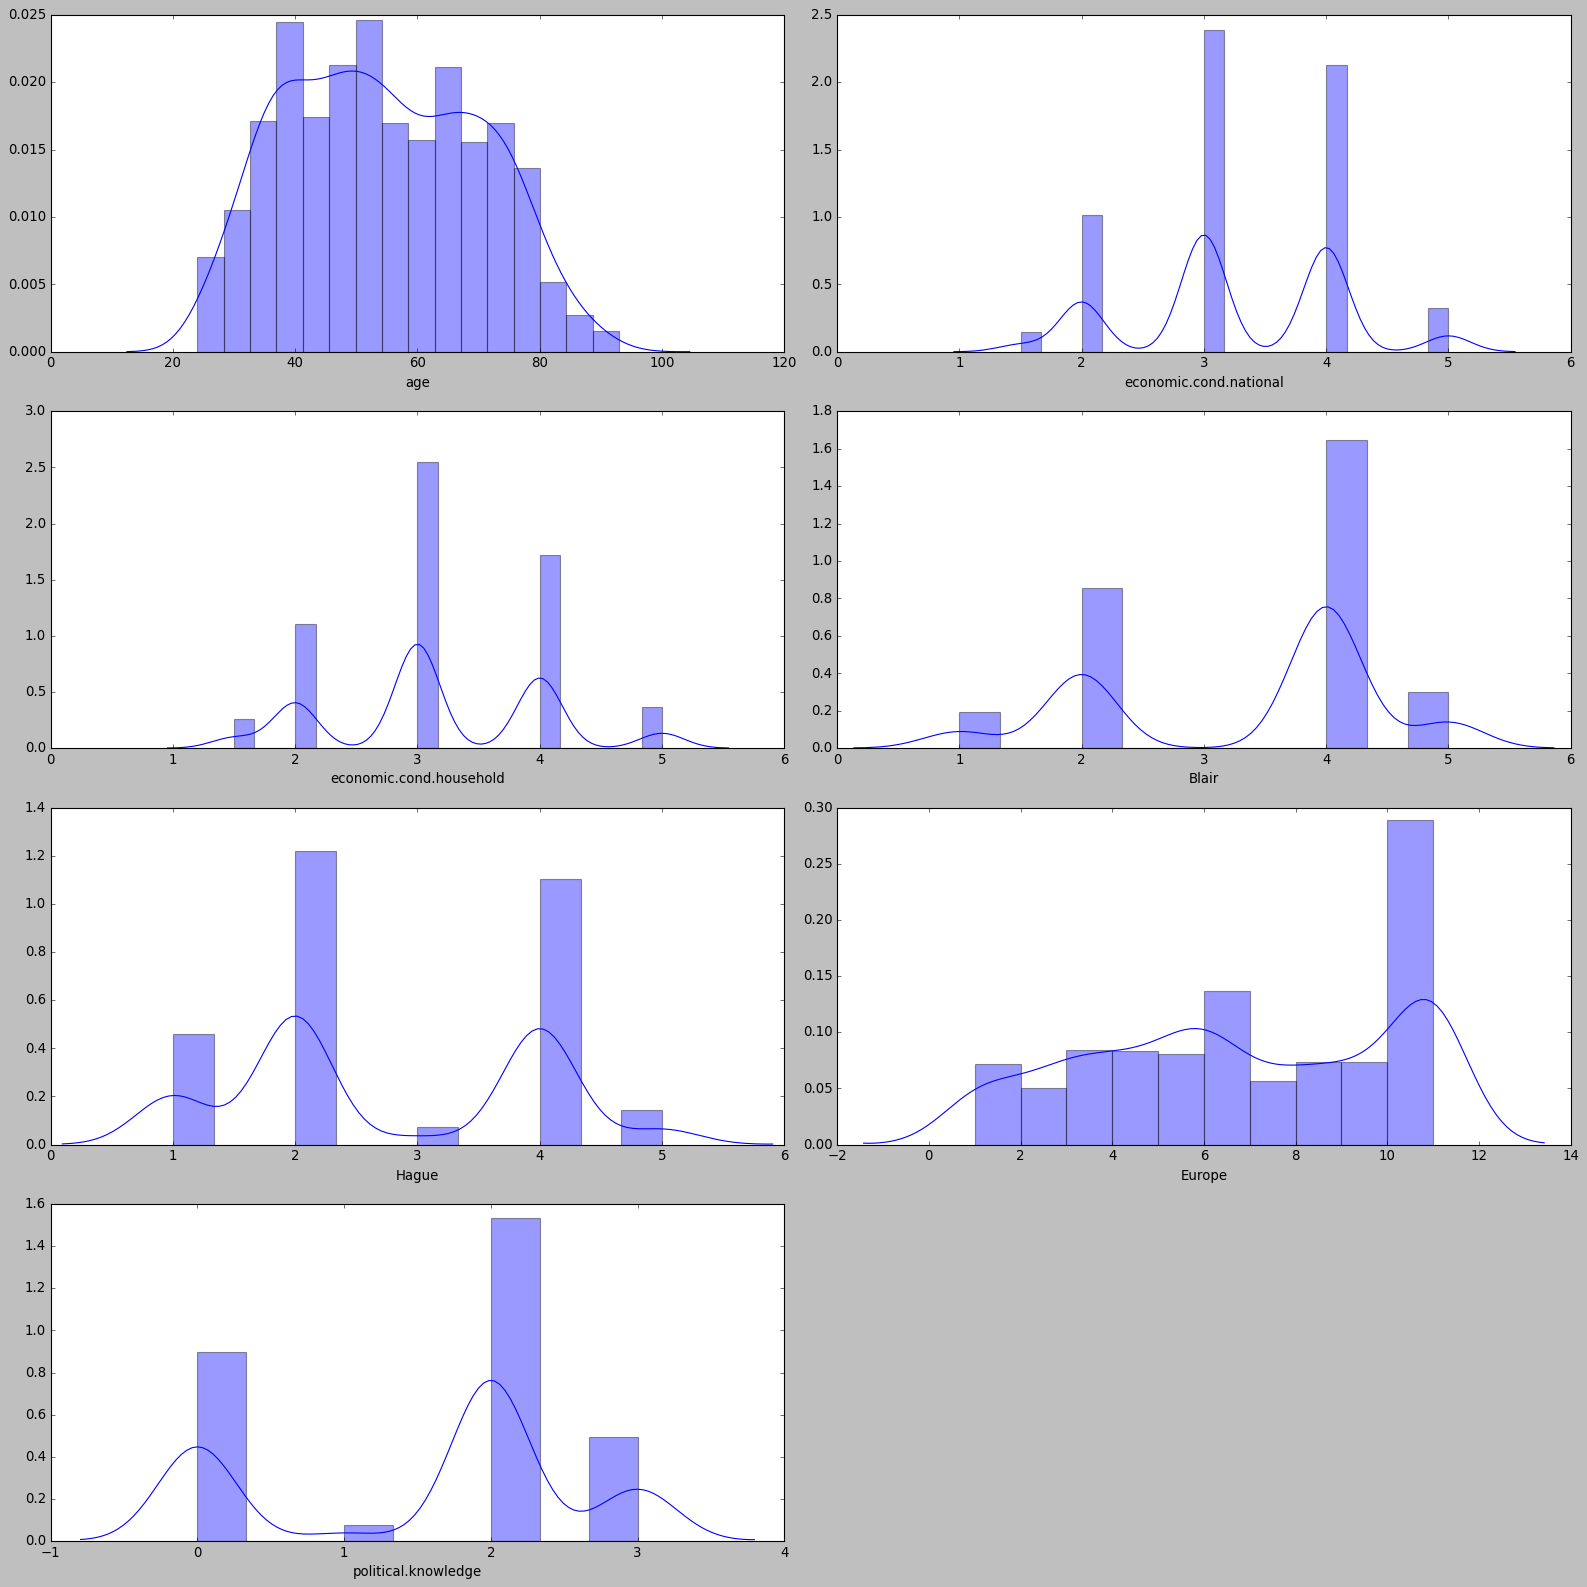

In [35]:
data_plot2=df1[['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot2.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.distplot(data_plot2[data_plot2.columns[i]])
    plt.tight_layout()
print('After Outliers Treatment')

## Bivariate and Multivariate Analysis

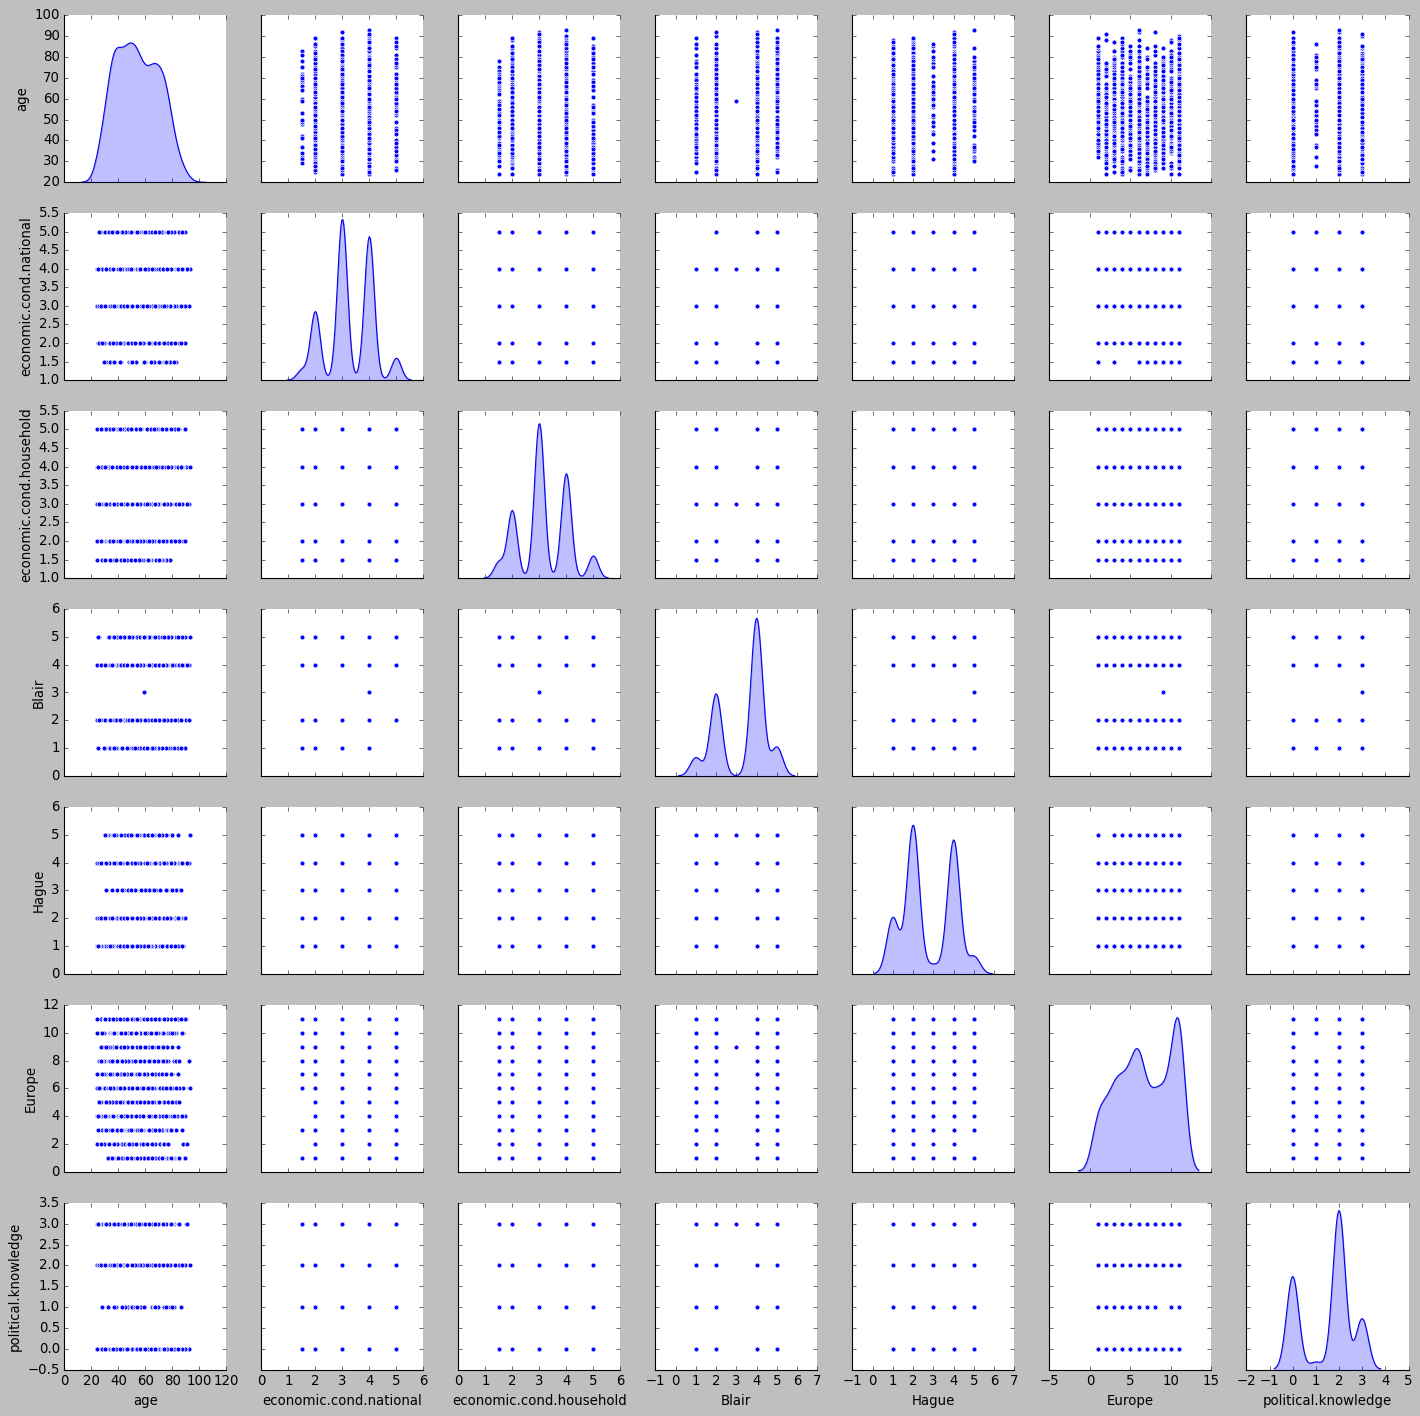

In [36]:
sns.pairplot(df1, diag_kind='kde')  
plt.show()

In [37]:
df1.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

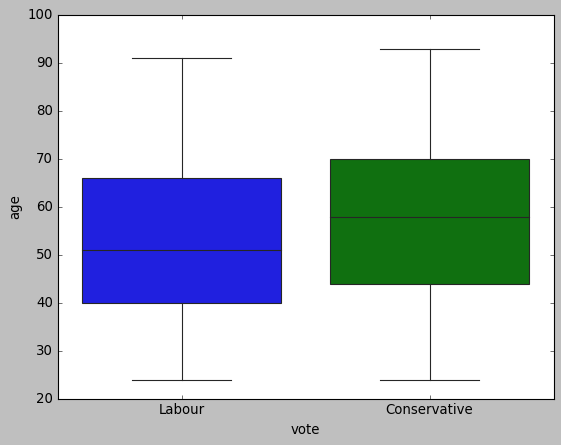

In [38]:
sns.boxplot(df1["vote"],df1['age'])

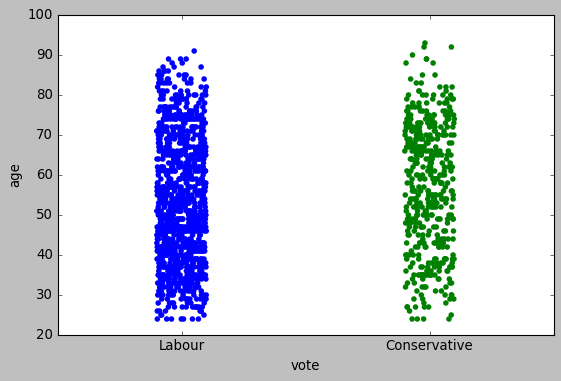

In [39]:
plt.figure(figsize=(8,5))
sns.stripplot(df1["vote"], df1['age'], jitter=True) 
plt.show()

Younger people predominantly vote for Labour

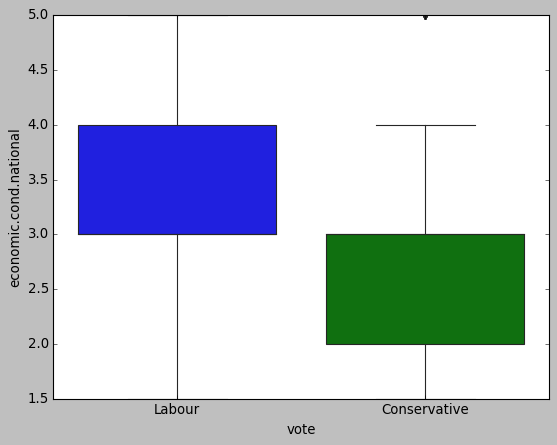

In [40]:
sns.boxplot(df1["vote"],df1['economic.cond.national'])

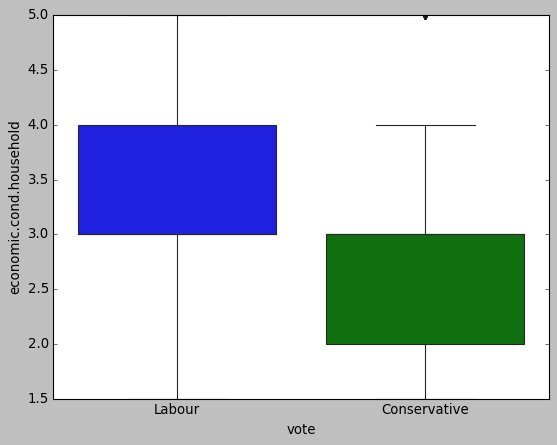

In [41]:
sns.boxplot(df1["vote"],df1['economic.cond.household'])

Those with higher economic.cond. values tend to vote for Labour

## Checking for Correlations

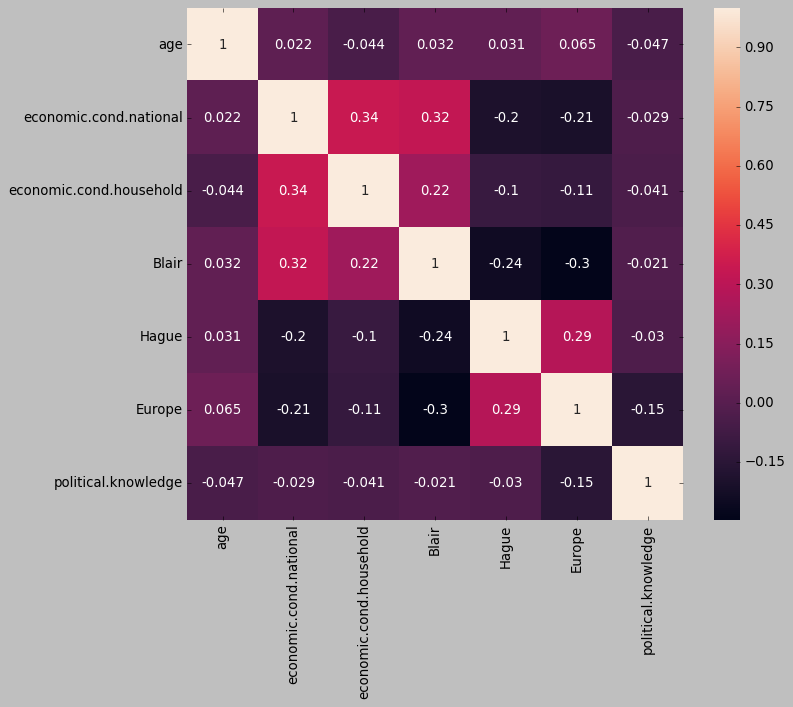

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

There is a moderately high postive correlation among variables such as 'economic.cond.national', 'economic.cond.household','Blair' and small negative correlations among others

## Encoding

In [43]:
df1 = pd.get_dummies(df1,drop_first=True)

In [44]:
df1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
1,43,3.0,3.0,4,1,2,2,1,0
2,36,4.0,4.0,4,4,5,2,1,1
3,35,4.0,4.0,5,2,3,2,1,1
4,24,4.0,2.0,2,1,4,0,1,0
5,41,2.0,2.0,1,1,6,2,1,1


In [45]:
df1.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

## Scaling the variables as continuous variables have different weightage using min-max technique

In [46]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
X = StandardScaler()

In [49]:
df1[num] = X.fit_transform(df1[num])
#df1[num] = df1[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [50]:
## Check if the variables have been scaled or not
df1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
1,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,1,0
2,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1,1
3,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1,1
4,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,1,0
5,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1,1


## Train-Test Split

In [51]:
# Copy all the predictor variables into X dataframe
X = df1.drop('vote_Labour', axis=1)

# Copy target into the y dataframe.  
y = df1['vote_Labour']

In [52]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

## Proportion of 1s and 0s

In [53]:
    df1.vote_Labour.value_counts(normalize=True)*100

1    69.676994
0    30.323006
Name: vote_Labour, dtype: float64

In [54]:
y_train.value_counts(normalize=True)*100

1    71.065033
0    28.934967
Name: vote_Labour, dtype: float64

1    71.065033
0    28.934967
Name: vote_Labour, dtype: float64


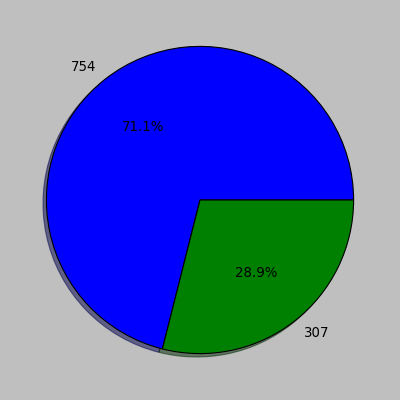

In [55]:
plt.pie(y_train.value_counts(), labels=y_train.value_counts().values, autopct='%1.1f%%', shadow=True);
print(y_train.value_counts(normalize=True)*100)

In [56]:
y_test.value_counts(normalize=True)*100

1    66.447368
0    33.552632
Name: vote_Labour, dtype: float64

1    66.447368
0    33.552632
Name: vote_Labour, dtype: float64


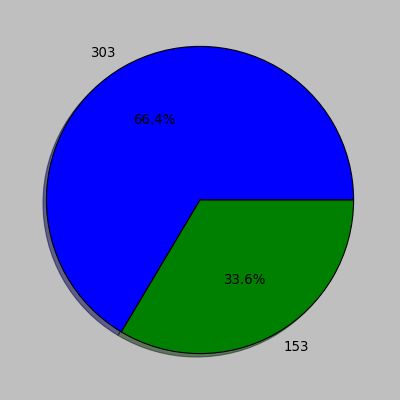

In [57]:
plt.pie(y_test.value_counts(), labels=y_test.value_counts().values, autopct='%1.1f%%', shadow=True);
print(y_test.value_counts(normalize=True)*100)

Since the distribution of values of target variable is verified and found close to equal, it can be concluded that the data set is properly split

## Checking the dimensions of the training and test data

In [58]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1061, 8)
X_test (456, 8)
y_train (1061,)
y_test (456,)


## Logistic Regression Model with GridSearch

In [59]:
from sklearn.linear_model import LogisticRegression
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [60]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [61]:
grid={'penalty':['elasticnet','l2','none','l1'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'tol':[0.0001,0.00001,0.000001],
      'verbose':[True, False]
      }

In [62]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,n_jobs=-1,scoring='f1')

In [63]:
grid_search.fit(X_train, y_train)

convergence after 17 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['elasticnet', 'l2', 'none', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05, 1e-06],
                         'verbose': [True, False]},
             scoring='f1')

In [64]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001, 'verbose': True} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='saga',
                   verbose=True)


In [65]:
best_model = grid_search.best_estimator_

In [66]:
logytrain_predict = model.predict(X_train)

In [67]:
logytest_predict = model.predict(X_test)

## AUC and ROC for the training and test data

In [68]:
# Training Data Probability Prediction
logy_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
logy_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


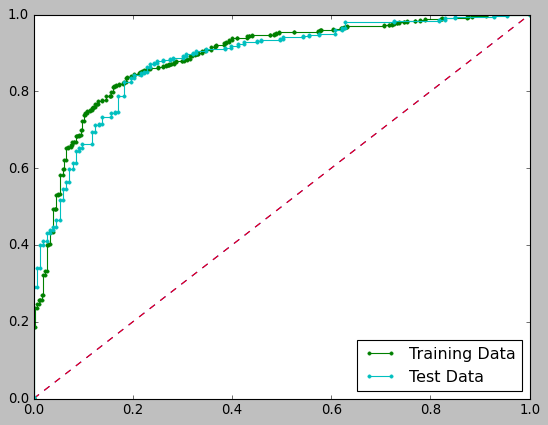

In [69]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,logy_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,logy_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,logy_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,logy_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Confusion Matrix for the train and test data

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



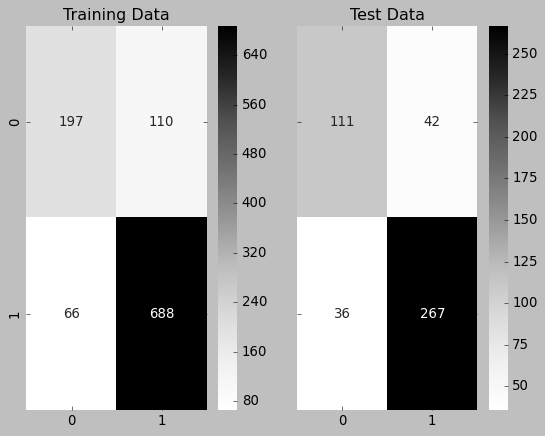

In [70]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,logytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,logytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,logytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,logytest_predict),'\n')



## Accuracy for the train and test data

In [71]:
#Accuracy - Training Data
model.score(X_train, y_train)

0.8341187558906692

In [72]:
# best model Accuracy - Training Data
best_model.score(X_train, y_train)

0.8350612629594723

In [73]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8289473684210527

In [74]:
# Best Model Accuracy - Test Data
best_model.score(X_test, y_test)

0.8289473684210527

## LDA model and evaluation

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [76]:
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X_train,y_train)

In [77]:
#Accuracy - Training Data
ldamodel.score(X_train, y_train)

0.8341187558906692

In [78]:
# Accuracy - Test Data
ldamodel.score(X_test, y_test)

0.831140350877193

In [79]:

ldapred_class_train = ldamodel.predict(X_train)

In [80]:

ldapred_class_test = ldamodel.predict(X_test)


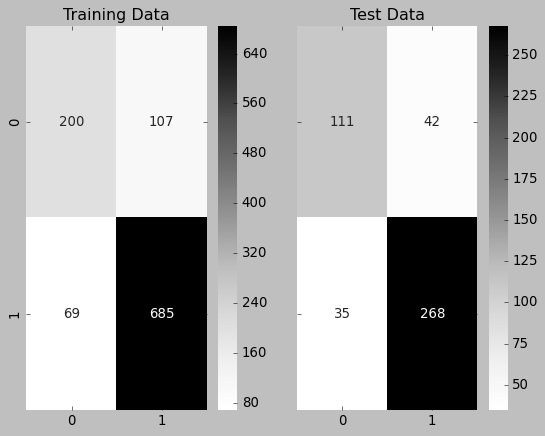

In [81]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ldapred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ldapred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [82]:
# X_train (1061, 8)
# X_test (456, 8)
# y_train (1061,)
# y_test (456,)

In [83]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ldapred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ldapred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [84]:
# Training Data Probability Prediction
ldapred_prob_train = ldamodel.predict_proba(X_train)

# Test Data Probability Prediction
ldapred_prob_test = ldamodel.predict_proba(X_test)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


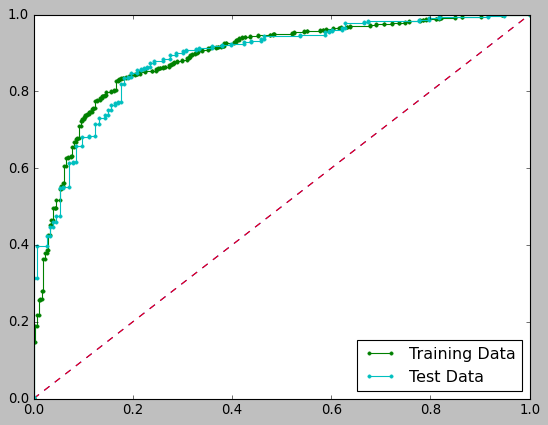

In [85]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,ldapred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ldapred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,ldapred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ldapred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## KNN model and evaluation

In [86]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [87]:
## Performance Matrix on train data set
knny_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, knny_train_predict))
print(metrics.classification_report(y_train, knny_train_predict))

0.8567389255419415
[[218  89]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [88]:
## Performance Matrix on test data set
knny_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, knny_test_predict))
print(metrics.classification_report(y_test, knny_test_predict))

0.8267543859649122
[[107  46]
 [ 33 270]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       153
           1       0.85      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.82       456



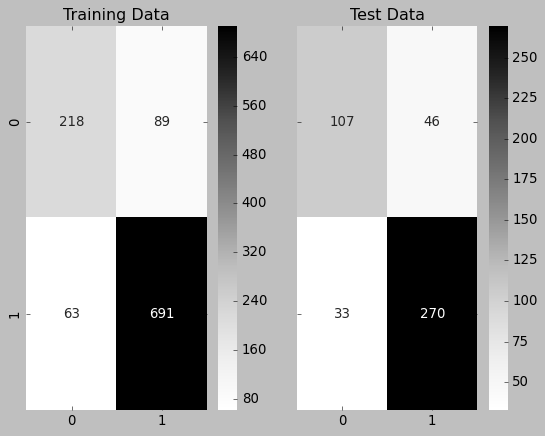

In [89]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,knny_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,knny_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [90]:
# Training Data Probability Prediction
knnpred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
knnpred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.929
AUC for the Test Data: 0.878


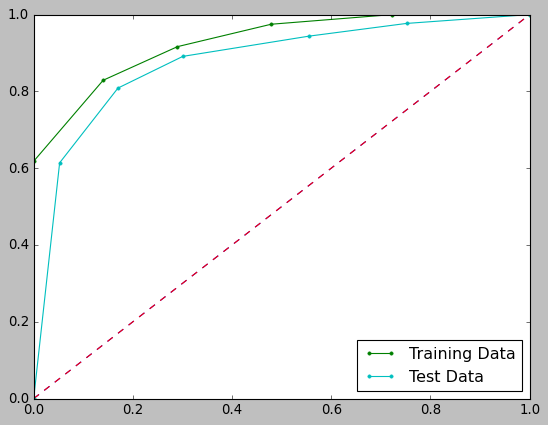

In [91]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,knnpred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,knnpred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,knnpred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,knnpred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Naive Bayes Model and evaluation

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [93]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [94]:
## Performance Matrix on train data set
nby_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, nby_train_predict))
print(metrics.classification_report(y_train, nby_train_predict))

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [95]:
y_test.value_counts()

1    303
0    153
Name: vote_Labour, dtype: int64

In [96]:
## Performance Matrix on test data set
nby_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, nby_test_predict))
print(metrics.classification_report(y_test, nby_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



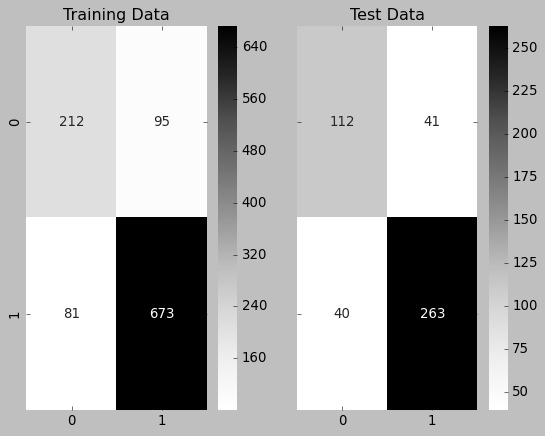

In [97]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,nby_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,nby_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [98]:
# Training Data Probability Prediction
nbpred_prob_train = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
nbpred_prob_test = NB_model.predict_proba(X_test)

AUC for the Training Data: 0.889
AUC for the Test Data: 0.876


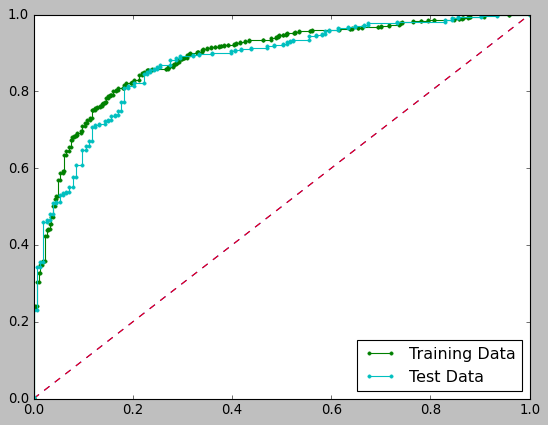

In [99]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,nbpred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,nbpred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,nbpred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,nbpred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Random Forest and evaluation

In [100]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [101]:
## Performance Matrix on train data set
rfy_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, rfy_train_predict))
print(metrics.classification_report(y_train, rfy_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [102]:
## Performance Matrix on test data set
rfy_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, rfy_test_predict))
print(metrics.classification_report(y_test, rfy_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



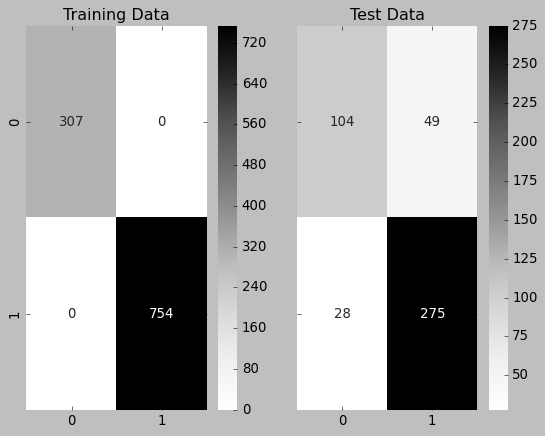

In [103]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,rfy_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,rfy_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [104]:
# Training Data Probability Prediction
rfpred_prob_train = RF_model.predict_proba(X_train)

# Test Data Probability Prediction
rfpred_prob_test = RF_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.896


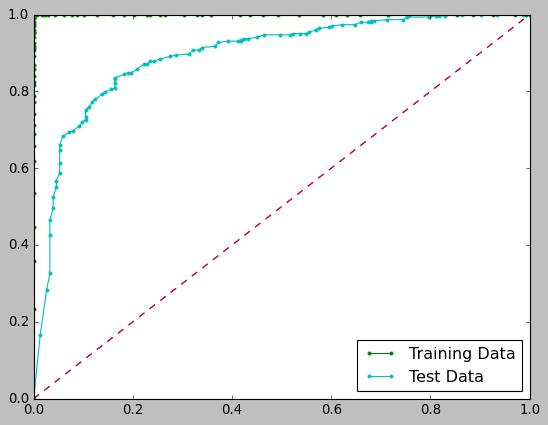

In [105]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,rfpred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,rfpred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,rfpred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,rfpred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Ada Boost and evaluation

In [106]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [107]:
## Performance Matrix on train data set
adby_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, adby_train_predict))
print(metrics.classification_report(y_train, adby_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [108]:
## Performance Matrix on test data set
adby_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, adby_test_predict))
print(metrics.classification_report(y_test, adby_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



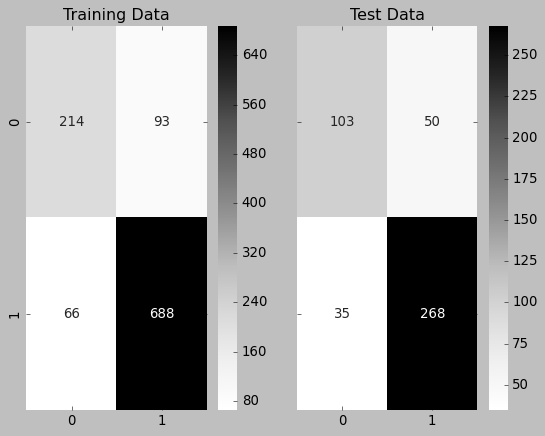

In [109]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,adby_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,adby_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [110]:
# Training Data Probability Prediction
adbpred_prob_train = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
adbpred_prob_test = ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.915
AUC for the Test Data: 0.877


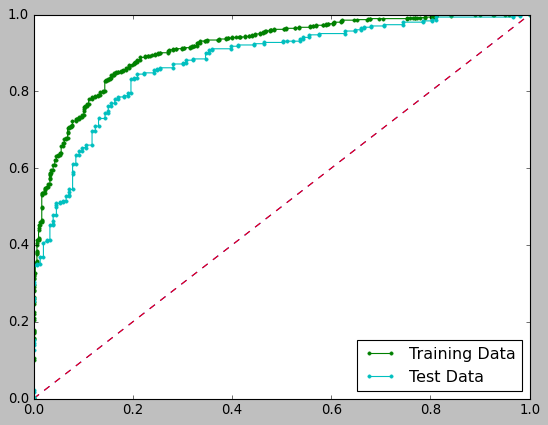

In [111]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,adbpred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,adbpred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,adbpred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,adbpred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Gradient Boosting and evaluation

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
gbclmodel = GradientBoostingClassifier(random_state=1)
gbclmodel.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [113]:
## Performance Matrix on train data set
gbcly_train_predict = gbclmodel.predict(X_train)
gbclmodel_score = gbclmodel.score(X_train, y_train)
print(gbclmodel_score)
print(metrics.confusion_matrix(y_train, gbcly_train_predict))
print(metrics.classification_report(y_train, gbcly_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [114]:
## Performance Matrix on test data set
gbcly_test_predict = gbclmodel.predict(X_test)
gbclmodel_score = gbclmodel.score(X_test, y_test)
print(gbclmodel_score)
print(metrics.confusion_matrix(y_test, gbcly_test_predict))
print(metrics.classification_report(y_test, gbcly_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



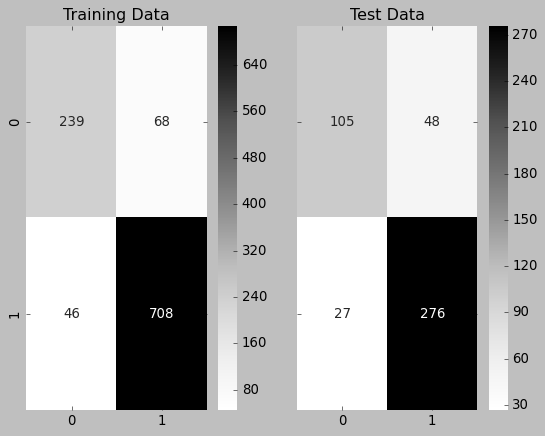

In [115]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,gbcly_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,gbcly_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [116]:
# Training Data Probability Prediction
gbclpred_prob_train = gbclmodel.predict_proba(X_train)

# Test Data Probability Prediction
gbclpred_prob_test = gbclmodel.predict_proba(X_test)

AUC for the Training Data: 0.951
AUC for the Test Data: 0.899


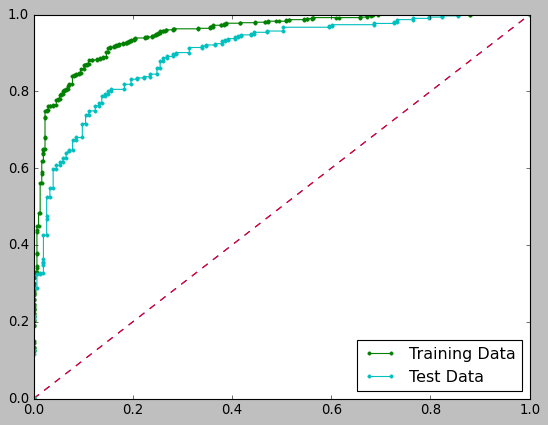

In [117]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,gbclpred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,gbclpred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,gbclpred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,gbclpred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [118]:
from sklearn import svm

clfSVM = svm.SVC()
clfSVM.fit(X_train, y_train)
svmy_pred=clfSVM.predict(X_test)
model_scoreSVM = clfSVM.score(X_test, y_test)
print(model_scoreSVM)
print(metrics.confusion_matrix(y_test, svmy_pred))

0.8399122807017544
[[106  47]
 [ 26 277]]


So we will select models which have performed approximately similar on the train and test data set and apply smote on the same to check if the performance has improved or not i.e. Naive Bayes and KNN

## SMOTE

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [121]:
X_train_res.shape

(1508, 8)

## Naive Bayes with SMOTE

In [122]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [123]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8209549071618037
[[622 132]
 [138 616]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       754
           1       0.82      0.82      0.82       754

    accuracy                           0.82      1508
   macro avg       0.82      0.82      0.82      1508
weighted avg       0.82      0.82      0.82      1508



The performace of NB training model didn't improve, so we shouldn't apply smote here.

# Problem Statement 2
Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973


-Find the number of characters, words and sentences for the mentioned documents.

-Remove all the stopwords from all the three speeches. 

-Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

-Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

## Importing all required Libraries

In [124]:
import nltk
import random
import string
from nltk.stem.snowball import SnowballStemmer
import json
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
import textstat

## Loading and checking the Data

In [125]:
# nltk.download('inaugural')
from nltk.corpus import inaugural
# inaugural.fileids()

In [126]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

## 1941-Roosevelt.txt

In [127]:
len(inaugural.words('1941-Roosevelt.txt'))

1536

In [128]:
len(inaugural.raw('1941-Roosevelt.txt'))

7571

In [129]:
len(inaugural.sents('1941-Roosevelt.txt'))

68

In [130]:
print(inaugural.raw('1941-Roosevelt.txt'))

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [131]:
#seeing that many stopwords were included in the frequency distribution, we should remove the stopwords
#nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(['--', '1789'])

R_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
R_words_clean = [word for word in R_words if word not in stopwords]
print(len(R_words_clean))


630


In [132]:
R_words_clean_freq = nltk.FreqDist(R_words_clean)
R_words_clean_freq

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [133]:
R_word_features = [item[0] for item in R_words_clean_freq.most_common(2000)]

In [134]:
len(R_word_features)

423

In [135]:
#R_word_features

In [136]:
R_words2 = ' '.join(R_words_clean)

In [137]:
R_cleaned_word2 = " ".join([word for word in R_words2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [138]:
R_wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(R_cleaned_word2)

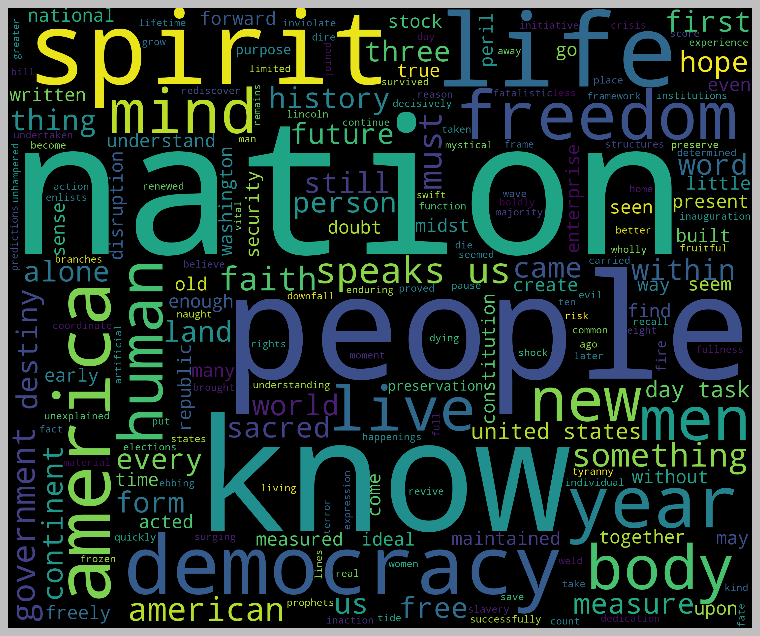

In [139]:
plt.figure(figsize=(12, 12))
plt.imshow(R_wordcloud)
plt.axis('off')
plt.show()

## 1961-Kennedy.txt

In [140]:
len(inaugural.words('1961-Kennedy.txt'))

1546

In [141]:
len(inaugural.raw('1961-Kennedy.txt'))

7618

In [142]:
len(inaugural.sents('1961-Kennedy.txt'))

52

In [143]:
print(inaugural.raw('1961-Kennedy.txt'))

Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.

We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

In [144]:
K_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
K_words_clean = [word for word in K_words if word not in stopwords]

print(len(K_words_clean))

697


In [145]:
K_words_clean_freq = nltk.FreqDist(K_words_clean)
K_words_clean_freq

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [146]:
K_word_features = [item[0] for item in K_words_clean_freq.most_common(2000)]

In [147]:
len(K_word_features)

456

In [148]:
K_words2 = ' '.join(K_words_clean)

In [149]:
K_cleaned_word2 = " ".join([word for word in K_words2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [150]:
K_wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(K_cleaned_word2)

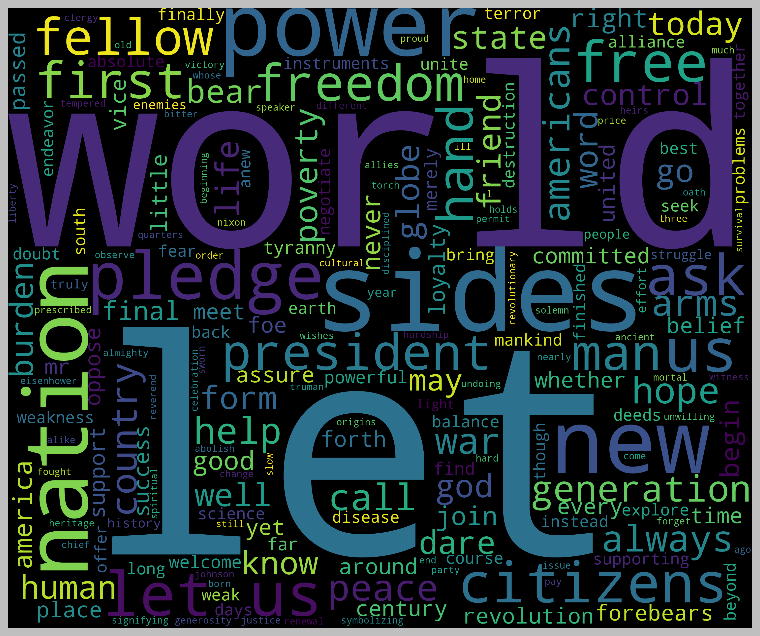

In [151]:
plt.figure(figsize=(12, 12))
plt.imshow(K_wordcloud)
plt.axis('off')
plt.show()

## 1969-Nixon.txt

In [152]:
len(inaugural.words('1969-Nixon.txt'))

2425

In [153]:
len(inaugural.raw('1969-Nixon.txt'))

11624

In [154]:
len(inaugural.sents('1969-Nixon.txt'))

106

In [155]:
print(inaugural.raw('1969-Nixon.txt'))

Senator Dirksen, Mr. Chief Justice, Mr. Vice President, President Johnson, Vice President Humphrey, my fellow Americans--and my fellow citizens of the world community:

I ask you to share with me today the majesty of this moment. In the orderly transfer of power, we celebrate the unity that keeps us free.

Each moment in history is a fleeting time, precious and unique. But some stand out as moments of beginning, in which courses are set that shape decades or centuries.

This can be such a moment.

Forces now are converging that make possible, for the first time, the hope that many of man's deepest aspirations can at last be realized. The spiraling pace of change allows us to contemplate, within our own lifetime, advances that once would have taken centuries.

In throwing wide the horizons of space, we have discovered new horizons on earth.

For the first time, because the people of the world want peace, and the leaders of the world are afraid of war, the times are on the side of peace.

In [156]:
N_words = (w.lower() for w in inaugural.words('1969-Nixon.txt'))
N_words_clean = [word for word in N_words if word not in stopwords]


print(len(N_words_clean))


1013


In [157]:
N_words_clean_freq = nltk.FreqDist(N_words_clean)
N_words_clean_freq

FreqDist({'us': 20, 'people': 14, 'world': 13, 'peace': 12, 'let': 11, 'man': 10, 'know': 10, 'make': 9, 'earth': 9, 'new': 8, ...})

In [158]:
N_word_features = [item[0] for item in N_words_clean_freq.most_common(2000)]

In [159]:
len(N_word_features)

619

In [160]:
#N_word_features

In [161]:
N_words2 = ' '.join(N_words_clean)

In [162]:
N_cleaned_word2 = " ".join([word for word in N_words2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [163]:
N_wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(N_cleaned_word2)

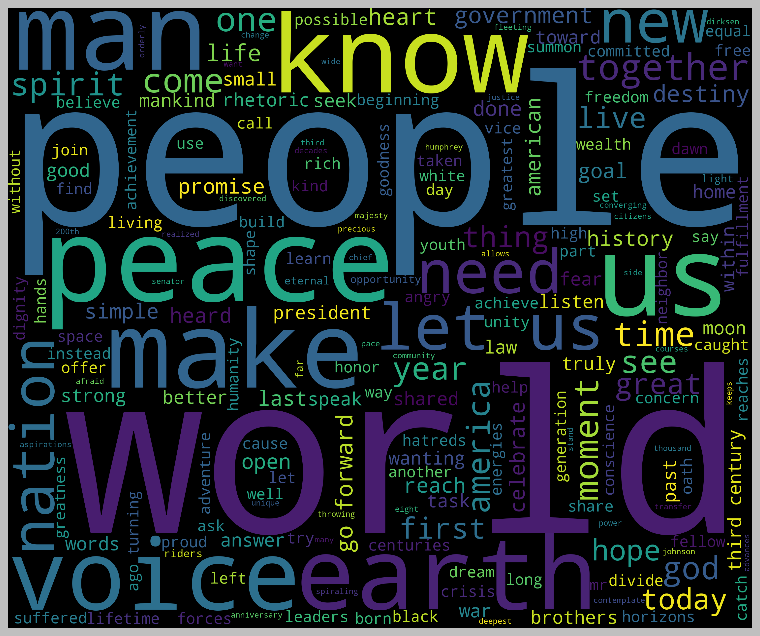

In [164]:
plt.figure(figsize=(12, 12))
plt.imshow(N_wordcloud)
plt.axis('off')
plt.show()